## Stability of Market Making system

### Equilibrium and Stability


An equilibrium $z^{E} = (Q, \tilde{X}^\eta) \in [\underline{q}, \bar{q}] \cap \mathbb{Z} \times \mathbb{R}$ for the market making system is the state that satisfies one of the following conditions:
- (In expectation) If $z_0 = z^{E}$, there exists a control $a^{E} \in \mathcal{A}$, where $\mathcal{A}$ is the set of admissible controls,  which satisfies $\mathbb{E}\big[ z_{t}^{a^{E}} \big] = z_0 $ for $\forall t \geq 0$.

We assume $Q = 0, \tilde{X}^\eta = 100$. Under certain control, the point is equilibrium. 


In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from lib.function import MC_sim

buy, sell = 0.1, 0.1 
lambda_buy, lambda_sell = 5, 5
kappa_buy, kappa_sell = 10, 10 
sigma = 0.1

Q0 = 0
X0 = 100
S0 = 10
T = 0.5 

batch_size = [100, 200, 400, 800, 1600]

c_cash_error = []
q_error = []

for batch in batch_size:
    _, inventory, compensated_cash = MC_sim(
        S0 = S0,
        Q0 = Q0, 
        X0 = X0, 
        lambda_buy = lambda_buy,
        lambda_sell = lambda_sell,
        kappa_buy = kappa_buy,
        kappa_sell = kappa_sell,
        buy_depth = buy,
        sell_depth = sell,
        sigma = 0.1,
        T = T,
        time_decimal = 3,
        batch_size = batch, 
    )
    c_cash_error.append(
        np.abs(X0 - np.mean(compensated_cash))
    )
    q_error.append(
        np.abs(Q0 - np.mean(inventory))
    )

In [19]:
print(f"Under control buy={buy} and sell={sell}, the expectation of inventory and compensated cash process is {np.mean(inventory)} and {np.mean(compensated_cash)}.")

Under control buy=0.1 and sell=0.1, the expectation of inventory and compensated cash process is 0.004375 and 100.13497135826414.


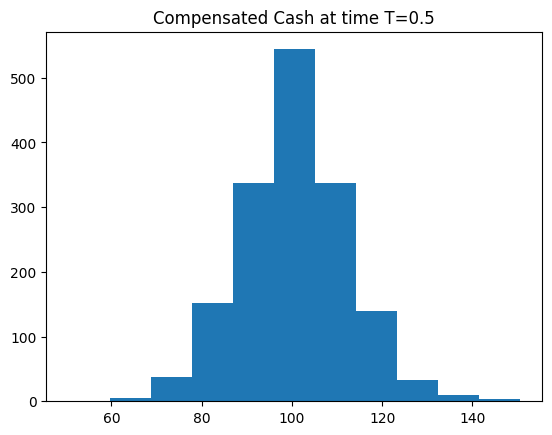

In [29]:
plt.hist(compensated_cash, bins=11, )
plt.title(f"Compensated Cash at time T={T}")
plt.show()

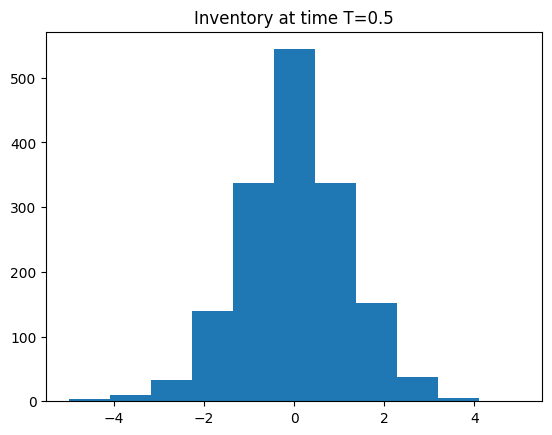

In [30]:
plt.hist(inventory, bins=11)
plt.title(f"Inventory at time T={T}")
plt.show()

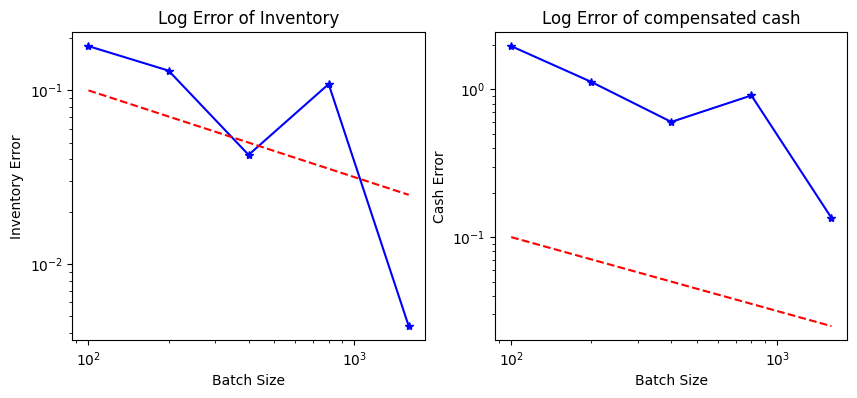

In [34]:
fig, ax = plt.subplots(1,2, figsize=(10,4))

ax[0].loglog(batch_size, q_error,'b*-')
ax[0].loglog(batch_size, np.power(batch_size,-0.5),'r--',label="order -0.5")
ax[0].set_ylabel("Inventory Error")
ax[0].set_xlabel("Batch Size")
ax[0].set_title("Log Error of Inventory")


ax[1].loglog(batch_size, c_cash_error,'b*-')
ax[1].loglog(batch_size, np.power(batch_size,-0.5),'r--',label="order -0.5")
ax[1].set_ylabel("Cash Error")
ax[1].set_xlabel("Batch Size")
ax[1].set_title("Log Error of compensated cash")
plt.show()